<a href="https://colab.research.google.com/github/Pengyu-gis/UrbanSound/blob/main/SoundingEarth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -O SoundingEarth.tar "https://zenodo.org/records/5600379/files/SoundingEarth.tar?download=1"

--2024-09-22 22:36:21--  https://zenodo.org/records/5600379/files/SoundingEarth.tar?download=1
Resolving zenodo.org (zenodo.org)... 188.184.98.238, 188.185.79.172, 188.184.103.159, ...
Connecting to zenodo.org (zenodo.org)|188.184.98.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24359464960 (23G) [application/octet-stream]
Saving to: ‘SoundingEarth.tar’

SoundingEarth.tar   100%[===================>]  22.69G  27.9MB/s    in 13m 34s 

2024-09-22 22:49:55 (28.6 MB/s) - ‘SoundingEarth.tar’ saved [24359464960/24359464960]



In [ ]:
!tar -xvf SoundingEarth.tar

In [3]:
import pandas as pd

# Load metadata
metadata_path = '/content/SoundingEarth/data/metadata.csv'
metadata = pd.read_csv(metadata_path)

# Display the first few rows
metadata.head()


,key,short_key,longitude,latitude,altitude,description,date_recorded,date_uploaded,creator,licenseurl,title,mp3name,mp3mb,mp3seconds,mp3channels,mp3bitrate,mp3samplerate
0,aporee_34015_39117,39117,4.318867,50.844867,36.0,The Ambiance of Metro Station Jacques Brel: Pe...,2016-10-15 16:00:00,2016-11-15 11:07:42,kemeny.daniel@gma...,http://creativecommons.org/publicdomain/mark/1.0/,"Inside Metro Station Jaques Brel, 1070 Anderle...",L28danielmetroJB.mp3,4.186944,202.080000,2,165579,48000
1,aporee_13525_15777,15777,10.176017,36.793692,11.0,On a small alley inside the souks area at a re...,2012-05-05 16:50:00,2013-02-22 05:58:08,Frank Schulte,http://creativecommons.org/publicdomain/mark/1.0/,"Tourbet El Bey, Tunis, Tunesien - tunis, souks...",Tunissouksautomaticprayer.mp3,1.318288,41.068500,2,256000,44100
2,aporee_9682_11591,11591,-94.776649,36.592652,237.0,Early morning birds.,2011-04-10 06:42:00,2013-02-21 18:22:54,the_bee@comca...,http://creativecommons.org/licenses/by-sa/3.0/,Lakewood Village Park,soundwalk6amgroveok.mp3,7.004366,437.768000,2,128000,44100
3,aporee_46141_52420,52420,120.600865,23.836124,59.0,"Farmland next to bamboo forest,Bird sound,Worm...",2019-08-27 06:11:00,2019-09-03 10:12:23,"Wu,Tsan-Cheng",http://creativecommons.org/licenses/by-nc-nd/3.0/,"大彎站,Ershui Township, Changhua County - Farmlan...",soundmap2019082773.mp3,15.926784,398.067200,2,320000,48000
4,aporee_31148_35816,35816,-76.760616,44.459393,137.0,Recorded on Sharp 722 portable MD recorder.Ste...,2004-04-20 20:10:00,2016-03-02 11:09:54,Andrzej Maciejewski,http://creativecommons.org/licenses/by-nc-sa/3.0/,"Moscow, ON, Canada - Frogs along Long Swamp Road.",MD128005RD01.mp3,3.066880,136.853333,2,179167,44100


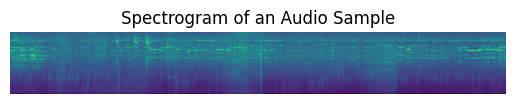

In [4]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Specify the path to the spectrograms
spectrograms_dir = '/content/SoundingEarth/data/spectrograms'

# List the available spectrogram files
spectrogram_files = os.listdir(spectrograms_dir)

# Display one spectrogram image
image_path = os.path.join(spectrograms_dir, spectrogram_files[0])
img = Image.open(image_path)

# Plot the spectrogram
plt.imshow(img)
plt.axis('off')
plt.title('Spectrogram of an Audio Sample')
plt.show()


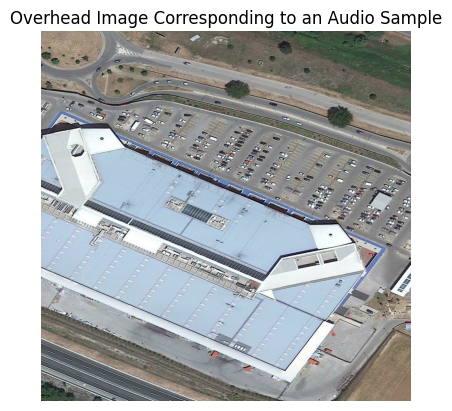

In [5]:
# Specify the path to the images
images_dir = '/content/SoundingEarth/data/images'

# List the available image files
image_files = os.listdir(images_dir)

# Display one image
image_path = os.path.join(images_dir, image_files[0])
img = Image.open(image_path)

# Plot the image
plt.imshow(img)
plt.axis('off')
plt.title('Overhead Image Corresponding to an Audio Sample')
plt.show()


In [7]:
# Assuming there's a column in metadata that links to the spectrograms, e.g., 'spectrogram_filename'
metadata[['short_key', 'latitude', 'longitude']].head()


,short_key,latitude,longitude
0,39117,50.844867,4.318867
1,15777,36.793692,10.176017
2,11591,36.592652,-94.776649
3,52420,23.836124,120.600865
4,35816,44.459393,-76.760616


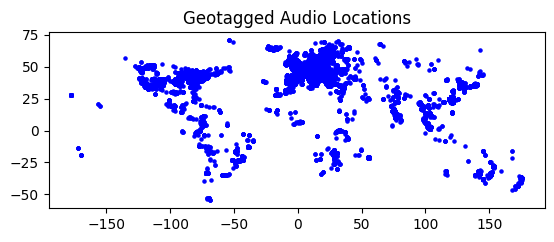

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Create a GeoDataFrame from metadata with geotagged data
gdf = gpd.GeoDataFrame(metadata, geometry=gpd.points_from_xy(metadata.longitude, metadata.latitude))

# Plot the locations of audio recordings
gdf.plot(marker='o', color='blue', markersize=5)
plt.title('Geotagged Audio Locations')
plt.show()
